In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn

In [2]:
import scipy.stats as stats

In [3]:
data = pandas.read_csv("A:/Programming/Python/NLP/Data files/Data cleaning outliers/deputies_dataset/deputies_dataset.csv")

In [4]:
data.head(10)

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value
0,0,2013-03-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,3.530749e+12,Fuels and lubricants.,AUTO POSTO 314 NORTE LTDA,70
1,0,2013-07-24 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,104
2,0,2013-02-17 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100
3,0,2013-03-15 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100
4,0,2013-01-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,77
5,0,2013-02-06 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,131
6,0,2013-04-18 00:00:00,1772,PSB,SP,Abelardo Camarinha,6.143204e+12,Fuels and lubricants.,AUTO POSTO AV ESMERALDA LTDA,2840
7,0,2013-05-14 00:00:00,1772,PSB,SP,Abelardo Camarinha,6.143204e+12,Fuels and lubricants.,AUTO POSTO AV ESMERALDA LTDA,2517
8,0,2013-06-21 00:00:00,1772,PSB,SP,Abelardo Camarinha,6.143204e+12,Fuels and lubricants.,AUTO POSTO AV ESMERALDA LTDA,2509
9,0,2013-07-20 00:00:00,1772,PSB,SP,Abelardo Camarinha,6.143204e+12,Fuels and lubricants.,AUTO POSTO AV ESMERALDA LTDA,2720


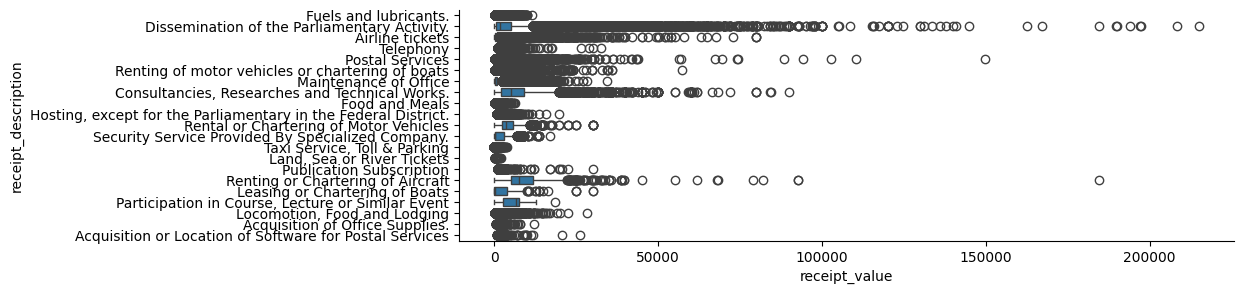

In [5]:
figure = plt.figure(figsize=(10, 3))
ax = seaborn.boxplot(data=data, x="receipt_value", y="receipt_description", orient='h')
seaborn.utils.despine(figure)

In [6]:
# v = [1, 3, 2, 4, 5, 5, 3, 5, 3, 4, 6, 15]
# z_score_v = stats.zscore(v)
# print(z_score_v)

In [7]:
# data_receipt_value_column
# data_receipt_description_values

data_receipt_value_column = data['receipt_value']
data_receipt_description_column = data['receipt_description']

data_receipt_description_values = list(data_receipt_description_column.unique())

z_score_receipt_value = stats.zscore(data_receipt_value_column)


distinct_rcpt_desc = len(data_receipt_description_values)
outliers_4_each_rcpt_desc = [[] for x in range(distinct_rcpt_desc)]
outliers_4_each_rcpt_desc_index = [[] for x in range(distinct_rcpt_desc)]

cnt = 0
for i in range(len(data_receipt_value_column)):
    rcpt_desc = data_receipt_description_column[i]
    rcpt_value = data_receipt_value_column[i]
#     print("rcpt value: ", rcpt_value)
#     print("rcpt des: ", rcpt_desc)
    ind = 0
    for j in data_receipt_description_values:
        if j==rcpt_desc:
            ind = data_receipt_description_values.index(j)
    outliers_4_each_rcpt_desc[ind].append(rcpt_value)
    outliers_4_each_rcpt_desc_index[ind].append(i)
    cnt += 1


# for i in range(len(outliers_4_each_rcpt_desc)):
#     print("Rcpt desc: ", data_receipt_description_values[i])
#     for j in outliers_4_each_rcpt_desc[i]:
#         print(j, end=" ")
#     print("\n")


In [8]:

#outliers_4_each_rcpt_desc

outliers_zscore_4_each_desc = [None] * len(outliers_4_each_rcpt_desc)
ind_outliers_rows = []

for i in range(len(outliers_4_each_rcpt_desc)):#take each desc rcpt_values
    z_score_i = stats.zscore(outliers_4_each_rcpt_desc[i])
    outliers_zscore_4_each_desc[i] = list(z_score_i)
    #print("Rcpt_Desc: ", data_receipt_description_values[i])
    #print(list(z_score_i))
    for j in outliers_zscore_4_each_desc[i]:
        if j<-3 or j>3:
#             print("z score value: ", j)
            ind_outliers_rows.append(
                outliers_4_each_rcpt_desc_index[i][outliers_zscore_4_each_desc[i].index(j)])
#             print("appended value: ", ind_outliers_rows[-1])
ind_outliers_rows = list(set(ind_outliers_rows))
#print("Index to be deleted: ", ind_outliers_rows)

 
len(data)
    

3014902

In [9]:
len(ind_outliers_rows)


12501

In [11]:
data.drop(ind_outliers_rows, inplace=True)

In [12]:
len(data)

3014902

In [12]:
len(data)

3002401

In [ ]:
cnt = 0
for i in ind_outliers_rows:
    if cnt%10 == 0:
        print("cnt %d Index to be deleted: %d"%(cnt, i))
    data.drop(index=i, inplace=True)
    cnt += 1

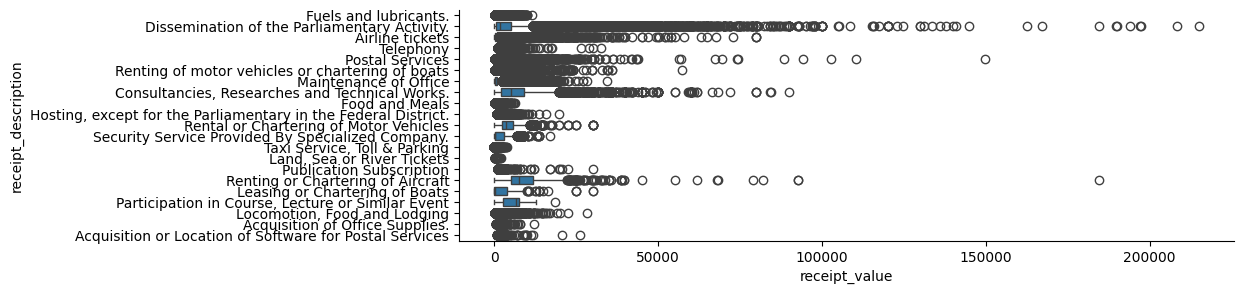

In [72]:
figure = plt.figure(figsize=(10, 3))
ax = seaborn.boxplot(data=data, x="receipt_value", y="receipt_description", orient='h')
seaborn.utils.despine(figure)

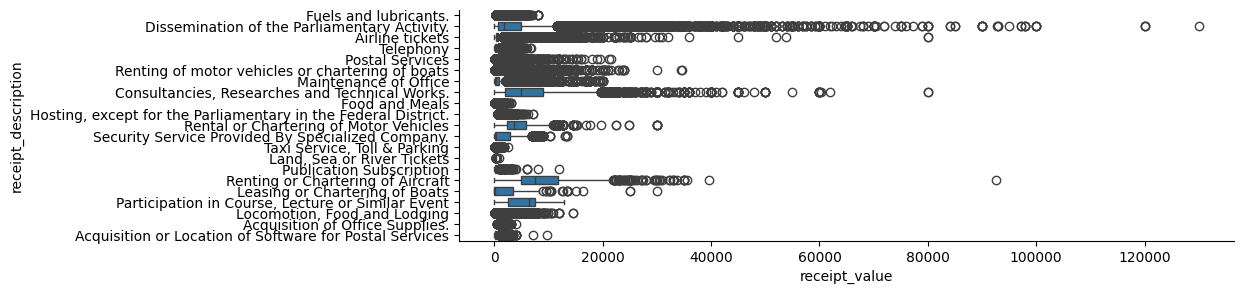

In [13]:
figure = plt.figure(figsize=(10, 3))
ax = seaborn.boxplot(data=data, x="receipt_value", y="receipt_description", orient='h')
seaborn.utils.despine(figure)